In [ ]:
# Первоначальная обработка статистических данных.

# Лабораторная работа № 1 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import expon
import matplotlib.pyplot as plt

# Набор данных:
data = np.array([[2.064, 0.94, 4.928, 0.943, 3.695, 5.482, 0.705, 0.939, 1.396, 2.415],
                 [1.395, 0.146, 1.64, 1.997, 0.041, 1.548, 2.209, 1.059, 0.232, 0.039],
                 [0.466, 1.32, 0.241, 2.868, 4.77, 2.482, 1.023, 1.389, 0.222, 2.169],
                 [5.375, 1.608, 1.941, 1.464, 1.208, 1.542, 0.619, 1.906, 0.741, 2.604],
                 [6.927, 1.79, 4.381, 0.043, 1.503, 0.417, 2.303, 1.537, 10.921, 2.087],
                 [9.411, 3.633, 2.254, 2.814, 0.497, 3.044, 2.832, 1.367, 3.648, 9.483],
                 [1.668, 0.828, 5.557, 6.035, 1.171, 0.333, 1.104, 2.632, 0.58, 2.676],
                 [3.604, 0.823, 1.396, 7.921, 3.041, 2.261, 0.233, 2.1, 0.026, 0.36],
                 [2.939, 3.2, 0.234, 5.611, 6.665, 3.222, 3.233, 2.51, 1.78, 0.028],
                 [4.649, 0.577, 0.472, 0.13, 4.305, 1.198, 5.612, 2.77, 0.132, 0.18],
                 [5.663, 1.774, 1.097, 0.305, 1.638, 6.714, 0.088, 3.123, 0.149, 5.202],
                 [0.401, 9.007, 0.148, 1.748, 6.172, 2.424, 1.253, 0.33, 2.136, 2.776],
                 [0.231, 1.896, 2.424, 0.659, 0.116, 9.778, 0.43, 4.015, 1.162, 0.651],
                 [0.23, 0.514, 7.561, 5.953, 0.255, 1.739, 0.196, 0.301, 0.071, 1.896],
                 [2.29, 1.102, 3.983, 0.152, 1.307, 0.503, 1.423, 6.213e-3, 0.15, 3.704]], dtype="float32")

sub_data = list(data.flatten())

n = len(sub_data)
print("Колличество измерений в массиве данных: ", n)

Колличество измерений в массиве данных:  150


In [ ]:
# 1. Найдите крайние члены вариационного ряда и размах выборки:
mini = round(np.min(sub_data), 5)
maxi = round(np.max(sub_data), 5)
print("Минимальный член вариационного ряда:", mini)
print("Максимальный член вариационного ряда:", maxi)
w = round(maxi - mini, 5)
print("Размах выборки:", w)

Минимальный член вариационного ряда: 0.00621
Максимальный член вариационного ряда: 10.921
Размах выборки: 10.91479


In [ ]:
# 2. Осуществить группировку данных:
l = int(1 + np.log2(n)) # правило Стёрджесса;
h = round(w / l, 5)
print("Число интервалов:", l)
print("Ширина интервала:", h)

Число интервалов: 8
Ширина интервала: 1.36435


In [ ]:
# Группировка данных:
f_0 = [np.min(sub_data)] # левые концы интервалов
f_1 = [np.min(sub_data) + h / 2] # серединные значения интервалов
f_2 = [np.min(sub_data) + h] # правые концы интервалов
for i in range(l - 1):
    f_0.append(f_0[i] + h)
    f_1.append(f_1[i] + h)
    f_2.append(f_2[i] + h)
print("1. Левые концы интервалов:", f_0)
print("\n2. Середины интервалов:", f_1)
print("\n3. Правые концы интервалов:", f_2, '\n')

sub_data.sort(); sub_data.append(max(sub_data) + 1) # добавляем фиктивный элемент, чтобы корректно отработал алгоритм ниже

#sub_data.append(max(sub_data) + 1)
# theta - двумерный массив данных, в котором хранятся числа, относимые к интервалу;
# + вспомогательные данные:
theta, x, k = [], [], 0

for index in range(len(sub_data)):
  if sub_data[index] < f_2[k]:
    x.append(sub_data[index])
  else:
    theta.append(x)
    k += 1
    x = []
    x.append(sub_data[index])

sub_data.pop()
theta = [len(x) for x in theta]
print("\nКолличество элементов входящих в соотв. интервал:", theta)

1. Левые концы интервалов: [0.006213, 1.3705630000442266, 2.7349130000442265, 4.0992630000442265, 5.4636130000442265, 6.827963000044226, 8.192313000044226, 9.556663000044226]

2. Середины интервалов: [0.6883880000442266, 2.0527380000442266, 3.4170880000442265, 4.7814380000442265, 6.145788000044226, 7.510138000044226, 8.874488000044227, 10.238838000044227]

3. Правые концы интервалов: [1.3705630000442266, 2.7349130000442265, 4.0992630000442265, 5.4636130000442265, 6.827963000044226, 8.192313000044226, 9.556663000044226, 10.921013000044226] 


Колличество элементов входящих в соотв. интервал: [64, 42, 19, 7, 10, 3, 3, 2]


In [ ]:
# 4. Вычислите выборочное среднее и выборочную дисперсию.
# Подсчёт статистических характеристик:
sm = round(np.mean(data), 5)
var = round(np.var(data), 5)

print("I.2: Выборочное среднее:", round(np.mean(data), 5))
print("II.2: Выборочная дисперсия:", round(np.var(data), 5))

p = np.array(theta) / n
heights = p / h
cumulative_sum = p.cumsum()

# Данные для построения гистограммы:
print("\nВероятности попадания в соотвествующий интервал:")
for i in range(len(p)):
    print(f"{i}-й интервал, вероятность: {round(p[i], 5)}")

print("\nВысоты прямоугольничков: ")
for i in range(len(heights)):
    print(f"{i + 1}-й прямоугольничек, площадь: {round(heights[i], 5)}")

# Кумулятивная сумма:
print('\n', cumulative_sum)

I.2: Выборочное среднее: 2.27537
II.2: Выборочная дисперсия: 5.22163

Вероятности попадания в соотвествующий интервал:
0-й интервал, вероятность: 0.42667
1-й интервал, вероятность: 0.28
2-й интервал, вероятность: 0.12667
3-й интервал, вероятность: 0.04667
4-й интервал, вероятность: 0.06667
5-й интервал, вероятность: 0.02
6-й интервал, вероятность: 0.02
7-й интервал, вероятность: 0.01333

Высоты прямоугольничков: 
1-й прямоугольничек, площадь: 0.31273
2-й прямоугольничек, площадь: 0.20523
3-й прямоугольничек, площадь: 0.09284
4-й прямоугольничек, площадь: 0.0342
5-й прямоугольничек, площадь: 0.04886
6-й прямоугольничек, площадь: 0.01466
7-й прямоугольничек, площадь: 0.01466
8-й прямоугольничек, площадь: 0.00977

 [0.42666667 0.70666667 0.83333333 0.88       0.94666667 0.96666667
 0.98666667 1.        ]


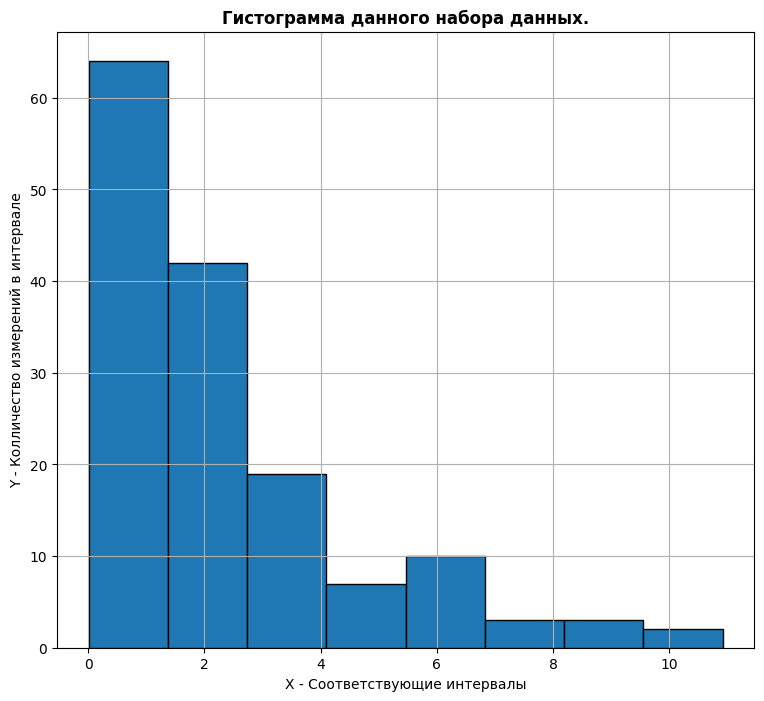

In [ ]:
# 3. По сгруппированным данным постройте гистограмму относительных частот.

# Настройка графика:
plt.figure(figsize=(9,8))
plt.grid()

# Гистограмма:
plt.hist(sub_data,
         bins = l,
         edgecolor='black')

# Добавление приписочек:
plt.title("Гистограмма данного набора данных.", fontweight = 'bold')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Колличество измерений в интервале')

# Вывод графика:
plt.show()

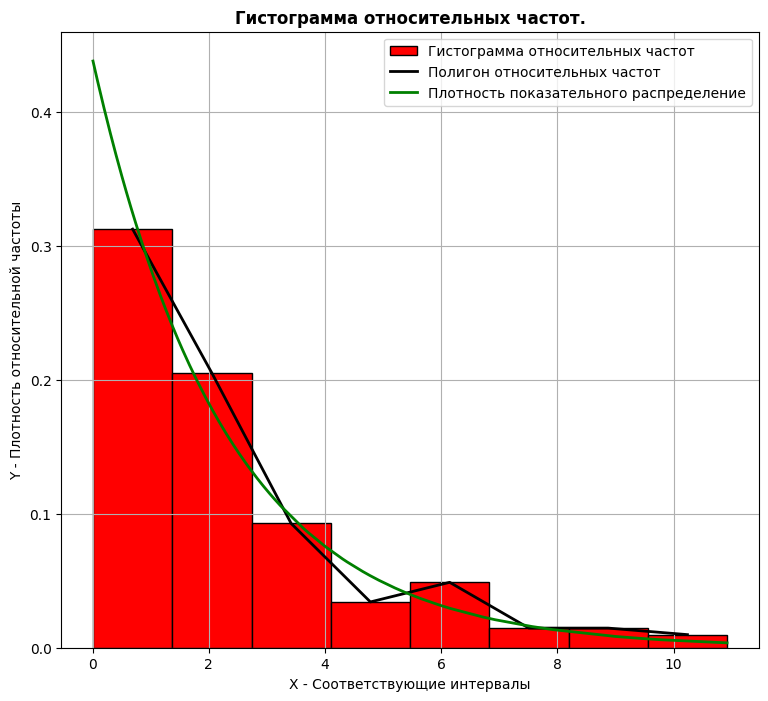

In [ ]:
# 5. По виду гистограммы определите возможный закон распределения, оцените
# параметры этого закона по методу моментов или методу максимального
# правдоподобия, постройте совмещенные графики гистограммы и плотности
# предполагаемого закона.


# Гистограмма относительных частот:
# Гистограмма в первом приближении похожа на показательное распределение.
# Показательное распределение в свою очередь зависит только лишь от одного параметра lambda.
# По методу моментов получается lambda = [1 / np.mean(data)]

# Теоретическая плотность, используя оценку параметра Показательного распределения:
lambd = 1 / sm
x_axis = np.array(sub_data)
y_axis = lambd * (np.exp(-lambd * np.array(sub_data)))

# Настройки графика:
plt.figure(figsize=(9,8))
plt.grid()

# Построение графика:
plt.hist(sub_data,
         bins=l,
         color='red',
         edgecolor='black',
         density=True,
         label='Гистограмма относительных частот')

plt.plot(f_1,
         heights,
         linewidth=2,
         color='black',
         label='Полигон относительных частот')

plt.plot(x_axis,
         y_axis,
         linewidth=2,
         label = 'Плотность показательного распределение',
         color = 'green')


# Приписочки:
plt.title("Гистограмма относительных частот.", fontweight = 'bold')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Плотность относительной частоты')
plt.legend()

# Вывод графика:
plt.show()

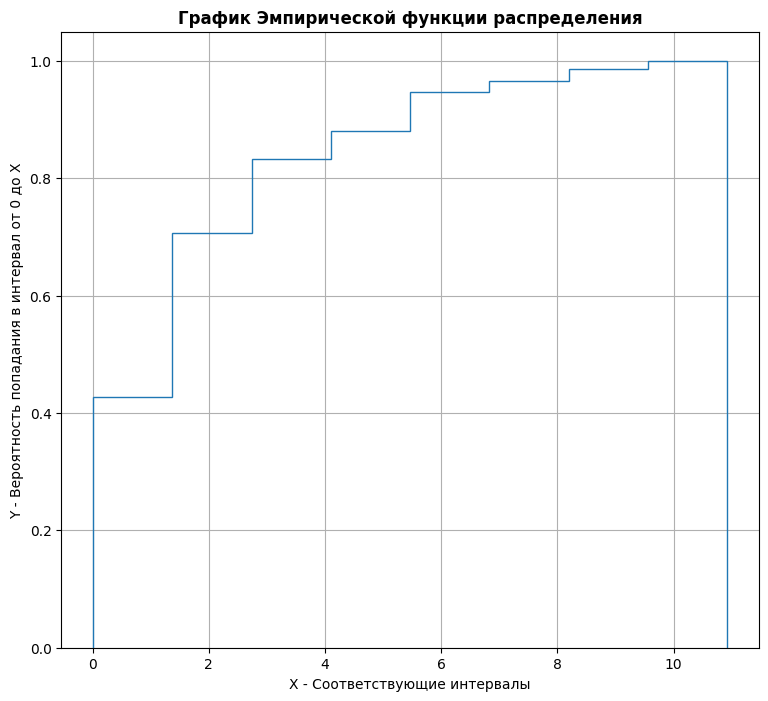

In [ ]:
# График эмпирической функции распрделения:

plt.figure(figsize=(9,8))
plt.grid()
plt.hist(sub_data,
         histtype='step',
         density=True,
         cumulative=True,
         bins=l)
plt.title("График Эмпирической функции распределения", fontweight = 'bold')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Вероятность попадания в интервал от 0 до X')

# Вывод графика:
plt.show()

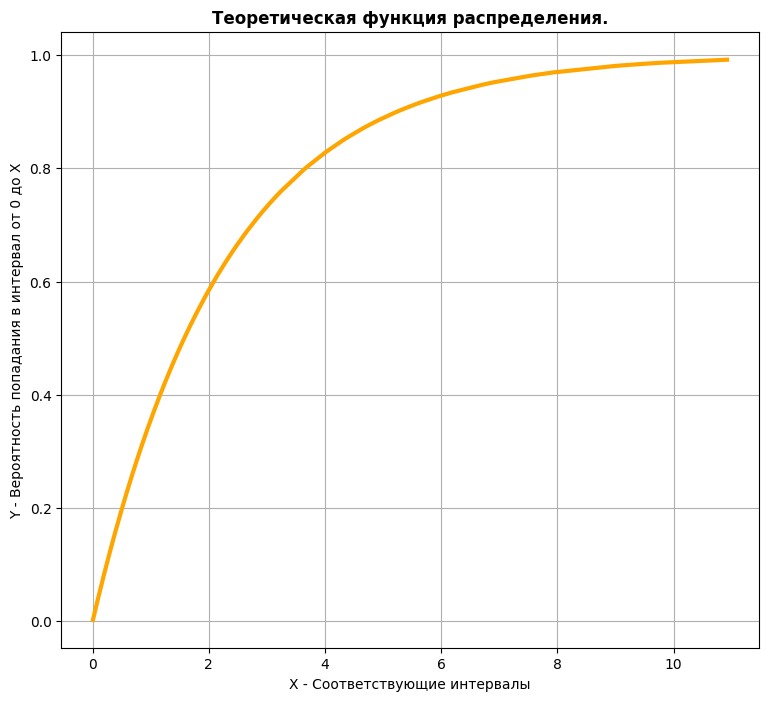

In [ ]:
# Теоретическая функция распределения показательного распрделения:
plt.figure(figsize=(9,8))
plt.grid()

# Моделирование функции распределения:
lambd = 1 / sm
x_axis = np.array(sub_data)
y_axis = 1 - (np.exp(-lambd * np.array(sub_data)))

plt.plot(x_axis,
         y_axis,
         linewidth=3,
         color="orange")

plt.title('Теоретическая функция распределения.', fontweight='bold')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Вероятность попадания в интервал от 0 до X')

# Вывод графика:
plt.show()

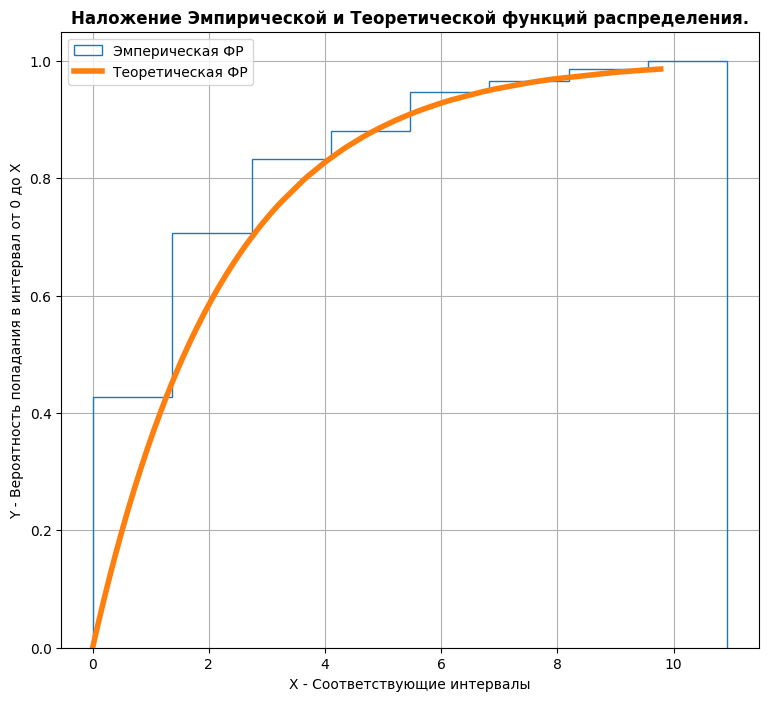

In [ ]:
# 6. Найдите эмпирическую функцию распределения и постройте совмещенные
# графики эмпирической и теоретической функций распределения.

# Настройка графика:
plt.figure(figsize=(9, 8))
plt.grid()

# График кумулятивной функции
plt.hist(sub_data,
         histtype='step',
         density=True,
         cumulative=True,
         bins=l,
         label='Эмперическая ФР')


# Теоретическая функция распрделения, от оценки параметра lambda:
lambd = 1 / sm
x_axis = np.array(sub_data[:-1])
y_axis = 1 - (np.exp(-lambd * np.array(sub_data[:-1])))

plt.plot(x_axis,
         y_axis,
         linewidth=4,
         label='Теоретическая ФР')


plt.title("Наложение Эмпирической и Теоретической функций распределения.", fontweight = 'bold')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Вероятность попадания в интервал от 0 до X')
plt.legend()

# Вывод графика:
plt.show()